In [8]:
import requests
import pandas as pd
import numpy as np
from IPython.display import Image

In [9]:
test = list(pd.read_csv('X_test.csv').drop(columns = ['Unnamed: 0']).iloc[129638])

In [10]:
def request (url,features,time,Report_or_classif): 
    
    r = requests.post(url,
                  json = {'features':[features],'time':[time],'Report_or_classif':[Report_or_classif]})   
        
    return r

In [11]:
def get_input(url, Classif_pred = False, Time_prediction = False, features = None, Time_lapse = 0):
    
    if Classif_pred == True and Time_prediction == True:
        Report_or_classif = 2
    elif Classif_pred == True:
        Report_or_classif = 0
    else:
        Report_or_classif = 1
        
    prediction = request (url,features,Time_lapse,Report_or_classif)
    
    if Report_or_classif == 0:
        print('The user will make a transaction: ' + prediction.text)
        
    if Report_or_classif == 1:
        print (prediction.text)
        pil_img = Image(filename='Plot1.png')
        display(pil_img)
        
    if Report_or_classif == 2:
        result = prediction.text.split(':')
        
        print('The user will make a transaction: ' + result[0])
        print()
        print('---' * 20)
        print()
        print("The report for the Time Series:")
        print()
        print (result[1])
        pil_img = Image(filename='Plot1.png')
        display(pil_img)
    

The user will make a transaction: [False]

------------------------------------------------------------

The report for the Time Series:

               yhat   yhat_lower    yhat_upper
month                                         
6       7058.676411   395.208561  13745.594797
7       7436.541379   814.353623  14177.327747
8       8547.722449  1809.310537  15170.627927
9       8913.860744  2335.244413  15540.851261
10      9658.447132  3011.037821  16347.005689
11     10441.620166  3785.041778  17109.996012
12     10791.375838  4142.342140  17428.456273


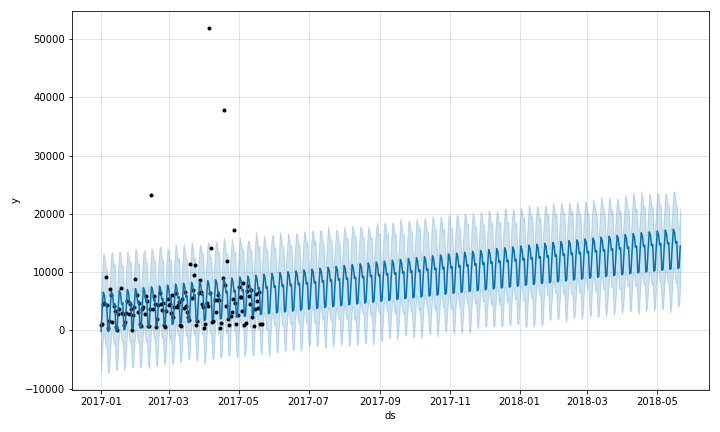

In [12]:
get_input('http://localhost:5000/api', features = test, Time_lapse = 365 , Classif_pred = True , Time_prediction = True)